# 1.Description
This project tackles the challenge of foreseeing failures in the Air Pressure System (APS) of Scania trucks. The APS is essential for safe braking, and if it doesn't work properly, accidents can happen. The issue is that manually checking APS in every truck is slow and costly. To fix this, Scania wants to predict failures using a smart model. I am going to do some classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing.

## 2.Exploratory Data Analysis

### 2.1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
import plotly.offline as offline
import plotly.graph_objs as go
import joblib
from sklearn.metrics import f1_score
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import math
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
import prettytable

In [2]:

from imblearn.over_sampling import RandomOverSampler
import umap

In [3]:

train_df = pd.read_csv('C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\aps_failure_training_set.csv',na_values=["na"])
train_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [4]:

test_df = pd.read_csv('C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\aps_failure_test_set.csv',na_values=["na"])
test_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [5]:
train_df.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

### 2.2 Data Cleaning
Replace pos with 1 and neg as 0, we will reoplace "na" by np.nan

In [6]:
train_df["class"] = train_df["class"].replace("pos",1)
train_df["class"] = train_df["class"].replace("neg",0)

test_df["class"] = test_df["class"].replace("pos",1)
test_df["class"] = test_df["class"].replace("neg",0)

train_df = train_df.replace({"na":np.nan})
test_df = test_df.replace({"na":np.nan})

In [7]:
train_df.head(6)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,0,38312,NaN,2.130706e+09,218.0,0.0,0.0,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0


In [8]:
test_df.head(2)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0




### 2.3 Distribution of class labels

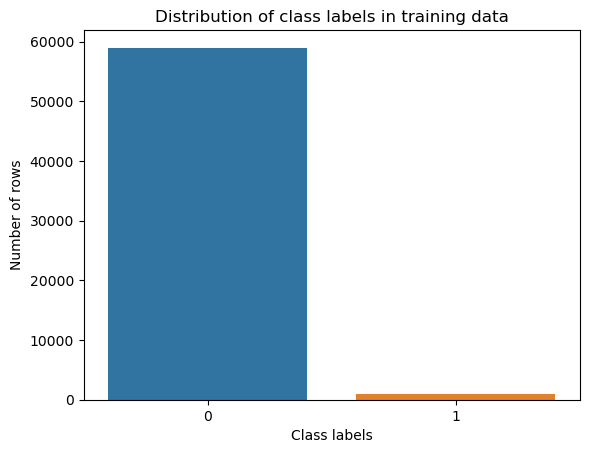

count of pos and neg data points are  0    59000
1     1000
Name: class, dtype: int64


In [9]:
sns.barplot(data=train_df,x=train_df['class'].unique(),y=train_df['class'].value_counts())
plt.xlabel("Class labels")
plt.ylabel("Number of rows")
plt.title("Distribution of class labels in training data")
plt.show()
print("count of pos and neg data points are ",train_df["class"].value_counts())

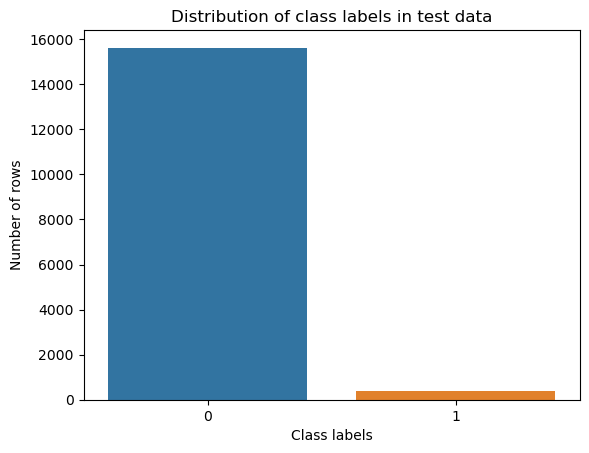

count of pos and neg data points are  0    15625
1      375
Name: class, dtype: int64


In [10]:
sns.barplot(data=test_df,x=test_df['class'].unique(),y=test_df['class'].value_counts())
plt.xlabel("Class labels")
plt.ylabel("Number of rows")
plt.title("Distribution of class labels in test data")
plt.show()
print("count of pos and neg data points are ",test_df["class"].value_counts())

### 2.4 Splitting and cross validation

In [11]:
# we are using strstied sampling because data is highly imbalanve and we same distribution of class labels in train and cv data
train,cv = train_test_split(train_df,test_size=0.2,random_state=1,stratify=train_df["class"])

In [12]:
'''train.to_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\train.csv",index=False)
cv.to_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\cv.csv",index=False)
test_df.to_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\test.csv",index=False)'''



'train.to_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\train.csv",index=False)\ncv.to_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\cv.csv",index=False)\ntest_df.to_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\test.csv",index=False)'

In [13]:
train_df = pd.read_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\train.csv")
train_df.head(2)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,240432,2.0,700.0,NaN,0.0,0.0,0.0,0.0,0.0,...,1351496.0,572640.0,1016878.0,939842.0,1590258.0,4725574.0,84676.0,8.0,0.0,0.0
1,0,820,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,2756.0,1270.0,5414.0,4380.0,7066.0,14060.0,0.0,0.0,0.0,0.0


### 2.5 Missing values

In [14]:
# ckeck if any missing value is present
train_df.isnull().sum()

class         0
aa_000        0
ab_000    37020
ac_000     2625
ad_000    11869
          ...  
ee_007      543
ee_008      543
ee_009      543
ef_000     2143
eg_000     2142
Length: 171, dtype: int64

In [15]:
column = np.array(train_df.columns[1:]) # store all column in a list
missing = np.array(48000 - train_df.count()) # count mumber of missing values for each attribue total rows is 48,000
missing = missing[1:]
missing = missing/480
print(missing)

[ 0.         77.125       5.46875    24.72708333  4.10625     4.10625
  1.13125     1.13125     1.13125     1.13125     1.13125     1.13125
  1.13125     1.13125     1.13125     1.13125     1.075       1.04166667
  1.04166667  7.24583333  1.07291667  1.04166667  1.07291667  0.97291667
  1.07291667  0.97291667  4.4625      1.04166667  1.04166667  1.04166667
  4.10416667  4.10625     1.13125     1.13125     1.13125     1.13125
  1.13125     1.13125     1.13125     1.13125     1.13125     1.13125
  1.13125     1.13125     1.13125     1.13125     1.13125     1.13125
  1.13125     1.13125     1.13125     1.13125     1.15416667  1.15416667
  1.15416667  1.15416667  1.15416667  1.15416667  1.15416667  1.15416667
  1.15416667  1.15416667  1.075       4.46875     4.47291667  4.1125
  4.10416667  1.07291667  1.07291667  0.97291667  0.97291667 38.28541667
 45.42708333 65.94791667 73.28958333 77.25416667 79.58958333 81.23541667
 82.14375     1.20208333  0.27916667  1.14791667  1.14791667  5.420833

In [16]:
max = np.max(missing) # find max value for number of missing value
max_index = np.argmax(missing)# find index for number of missing value
max_col = column[max_index]# find colum name for number of missing value

min = np.min(missing)
min_index = np.argmin(missing)
min_col = column[min_index + 1]

print("column",min_col,"has no missing value while column",max_col,"has highest missing value which is ",missing[max_index],'%')

column ab_000 has no missing value while column br_000 has highest missing value which is  82.14375 %


In [17]:
# seperating columns based on prcentage of missing values
miss_10 = []
miss_10_70 = []
miss_70 = []
for i in range(len(missing)):
    if missing[i] <= 10:
        miss_10.append(i)
    elif missing[i] > 10 and missing[i] < 70:
        miss_10_70.append(i)
    else:
        miss_70.append(i)

miss_column_70 = column[miss_70]
miss_column_10 = column[miss_10]
miss_column_10_70 = column[miss_10_70]
print("columns for which missing values are more than 70%\n")

for i in range(len(miss_70)):
    print("for column",miss_column_70[i],"percentage of missing values are",missing[miss_70[i]],"%")

columns for which missing values are more than 70%

for column ab_000 percentage of missing values are 77.125 %
for column bn_000 percentage of missing values are 73.28958333333334 %
for column bo_000 percentage of missing values are 77.25416666666666 %
for column bp_000 percentage of missing values are 79.58958333333334 %
for column bq_000 percentage of missing values are 81.23541666666667 %
for column br_000 percentage of missing values are 82.14375 %
for column cr_000 percentage of missing values are 77.125 %



br_000 has the highest missing value which is 82.14375 %.

In [18]:
# for those columns where more than 70% values are missing we are filling it with -10000000 for further analysis
missing_df_70 = train_df[miss_column_70]
missing_df_70.fillna(-1000000,inplace=True)
missing_df_70.head()

,ab_000,bn_000,bo_000,bp_000,bq_000,br_000,cr_000
0,2.0,125540.0,128000.0,148940.0,135020.0,144840.0,0.0
1,0.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,0.0
2,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0
3,0.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,0.0
4,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0


In [19]:
miss_counts = []
for i in miss_column_70:
    temp_df = missing_df_70[[i]]
    temp_df["class"] = train_df["class"]
    temp_df = temp_df.loc[temp_df[i] == -1000000]
    miss_counts.append(np.array(temp_df["class"].value_counts()))

In [20]:
count_class = np.array(train_df["class"].value_counts())
for i in range(len(miss_counts)):
    print("for those rows where column",miss_column_70[i], "is missing no of rows belong to class 1 are",miss_counts[i][1],"and class 0 are",miss_counts[i][0])

print("total no of points belonging to class 1 and class 0 are",count_class[0],"and",count_class[1],"respectively")

for those rows where column ab_000 is missing no of rows belong to class 1 are 614 and class 0 are 36406
for those rows where column bn_000 is missing no of rows belong to class 1 are 56 and class 0 are 35123
for those rows where column bo_000 is missing no of rows belong to class 1 are 58 and class 0 are 37024
for those rows where column bp_000 is missing no of rows belong to class 1 are 63 and class 0 are 38140
for those rows where column bq_000 is missing no of rows belong to class 1 are 67 and class 0 are 38926
for those rows where column br_000 is missing no of rows belong to class 1 are 70 and class 0 are 39359
for those rows where column cr_000 is missing no of rows belong to class 1 are 614 and class 0 are 36406
total no of points belonging to class 1 and class 0 are 47200 and 800 respectively


we can see that for column ab_000 and cr_000 points beloging to positive class are 614 among 800 positive points so we will keep this feature and discard all other feature where no of missing value are mote than 70% while keeping this feature we will keep the feature name as it is and replace missing value with 1 and rest of all the values with 0

In [21]:
# create a data frame to store these faetures
temp1 = np.array(missing_df_70["ab_000"])
temp2 = np.array(missing_df_70["cr_000"])
temp1 = np.where((temp1 == -1000000),1,0)
temp2 = np.where((temp2 == -1000000),1,0)

df_70 = pd.DataFrame(list(zip(temp1,temp2)),columns=["ab_000","cr_000"])

For those columns where no of missing values are less than 10% we are imputing with median and for missing values between 10% to 70% we are using KNN based imputation

In [22]:
#replace values in those columns which have missing value less than 10% by median value for corresponding feature
df_10 = train_df[miss_column_10]
df_10_70 = train_df[miss_column_10_70]

df_10.fillna(df_10.median(),inplace=True)

# replace values in those columns which have missing value between 10% and 70% by knn inputaion using fit_transform
imputer = KNNImputer(n_neighbors=2)
df_10_70 = pd.DataFrame(imputer.fit_transform(df_10_70))
df_10_70.columns = miss_column_10_70

train_cleaned = pd.concat([df_10,df_10_70,df_70],axis=1)
train_cleaned["class"] = train_df["class"]

In [23]:
# store data in csv file after filling missing values
#train_cleaned.to_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\clean_train.csv",index=False)

In [24]:
# # save imputer to disk
knn_imputer = "C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\knn_imputer1.pkl"
joblib.dump(imputer,knn_imputer)
new_imputer = joblib.load(knn_imputer)


In [25]:


# Cleaning those columns which have missing value more than 70%

cv_df = pd.read_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\cv.csv")#bn_000

cv_df = cv_df.drop(["bn_000","bo_000","bp_000","bq_000","br_000"],axis=1)

cv_df[["ab_000","cr_000"]] = cv_df[["ab_000","cr_000"]].fillna(1)

cv_df.loc[cv_df["ab_000"] != 1, "ab_000"] = 0
cv_df.loc[cv_df["cr_000"] != 1, "cr_000"] = 0

cv_df_70 = cv_df[["ab_000","cr_000"]]

In [26]:
# save median of train data which we will use to replace null values in test and cv data
#train_df[miss_column_10].median().to_csv("/content/drive/MyDrive/Scania truck failure data/median.csv",index=False)
median = pd.read_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\median.csv")

In [27]:
#replace values in those columns which have missing value less than 10% by median value of train data for corresponding feature
cv_df[miss_column_10] = cv_df[miss_column_10].fillna(train_df[miss_column_10].median())
cv_df[miss_column_10].isnull().values.any()

cv_df_10 = cv_df[miss_column_10]


In [28]:
# replace values in those columns which have missing value between 10% and 70% by knn inputaion using fit_transform
cv_df_10_70 = pd.DataFrame(new_imputer.transform(cv_df[miss_column_10_70]))
cv_df_10_70.columns = miss_column_10_70
cv_df_10_70.isnull().values.any()

False

In [29]:
# combine all the columns
cv_cleaned = pd.concat([cv_df_10,cv_df_10_70,cv_df_70],axis=1)
# adding clas labels
cv_cleaned["class"] = cv_df["class"]

In [30]:
# store cv_data in csv file after filling missing values
#cv_cleaned.to_csv("/content/drive/MyDrive/Scania truck failure data/clean_cv.csv",index=False)

In [31]:
# Cleaning those columns which have missing value more than 70%
test_df = pd.read_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\test.csv")#bn_000

test_df = test_df.drop(["bn_000","bo_000","bp_000","bq_000","br_000"],axis=1)# drop these columns

test_df[["ab_000","cr_000"]] = test_df[["ab_000","cr_000"]].fillna(1) # fill nan values with 1

test_df.loc[test_df["ab_000"] != 1, "ab_000"] = 0# fill everything except 1 with zero
test_df.loc[test_df["cr_000"] != 1, "cr_000"] = 0

test_df_70 = test_df[["ab_000","cr_000"]]

In [32]:
# replace values in those columns which have missing value less than 10% by median value of train data for corresponding feature
test_df[miss_column_10] = test_df[miss_column_10].fillna(train_df[miss_column_10].median())
test_df[miss_column_10].isnull().values.any()

test_df_10 = test_df[miss_column_10]

In [33]:
# replace values in those columns which have missing value between 10% and 70% by knn inputaion using fit_transform
test_df_10_70 = pd.DataFrame(new_imputer.transform(test_df[miss_column_10_70]))
test_df_10_70.columns = miss_column_10_70
test_df_10_70.isnull().values.any()

False

In [34]:
# combine all the columns
test_cleaned = pd.concat([test_df_10,test_df_10_70,test_df_70],axis=1)
# adding clas labels
test_cleaned["class"] = test_df["class"]

In [35]:
# store cv_data in csv file after filling missing values
#test_cleaned.to_csv("/content/drive/MyDrive/Scania truck failure data/clean_test.csv",index=False)

### 2.6 Checking for duplicate

In [36]:
# ckeck if any duplicate value is present
train_df.duplicated().values.any()

False

Hence there is no duplicate

### 2.7 Univariate Analysis

In [44]:
train_df = pd.read_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\clean_train.csv")
train_df.head(2)

,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,...,cy_000,cz_000,da_000,db_000,dc_000,ec_00,ed_000,ab_000,cr_000,class
0,240432,700.0,0.0,0.0,0.0,0.0,0.0,526538.0,4349060.0,6196126.0,...,0.0,8822.0,0.0,0.0,10183782.0,4126.58,4986.0,0,0,0
1,820,20.0,0.0,0.0,0.0,0.0,0.0,0.0,45186.0,10624.0,...,0.0,54.0,0.0,0.0,44888.0,187.92,132.0,0,0,0


In [45]:
target = train_df["class"]
train_df = train_df.drop(["class"],axis=1)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Columns: 165 entries, aa_000 to cr_000
dtypes: float64(162), int64(3)
memory usage: 60.4 MB


In [46]:
clf = DecisionTreeClassifier(max_depth=6,splitter="best")
clf.fit(train_df,target)

feat_imp = clf.feature_importances_

imp_col_10 = np.argpartition(feat_imp,-10)[-10:]
imp_col_5 = np.argpartition(feat_imp,-5)[-5:]

columns = np.array(train_df.columns)

train_df_10 = train_df[columns[imp_col_10]]
train_df_5 = train_df[columns[imp_col_5]]

train_df_10["class"] = target
train_df_5["class"] = target

train_df_10.head(2)

,bi_000,ay_002,ay_006,ag_002,ag_001,bj_000,cc_000,al_000,ay_005,ay_008,class
0,741016.0,0.0,26154.0,0.0,0.0,936496.0,13403012.0,337652.0,2488.0,11391860.0,0
1,11320.0,0.0,0.0,0.0,0.0,8702.0,60094.0,980.0,0.0,14276.0,0


In [48]:
train_df_10.columns

Index(['bi_000', 'ay_002', 'ay_006', 'ag_002', 'ag_001', 'bj_000', 'cc_000',
       'al_000', 'ay_005', 'ay_008', 'class'],
      dtype='object')

In [49]:
def boxplot(name,df):
    """
    this function takes name of column as input and boxplot
    """
    plt.figure(figsize=(14, 4))

    plt.subplot(1,2,2)
    sns.boxplot(x=train_df_10["class"],y=df[name])
    plt.title("Boxplot for column " + name)
    plt.show()

In [50]:
# Analysing bi_000 :

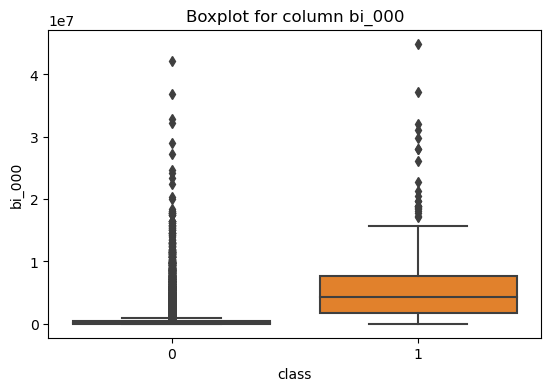

In [51]:
# Analysing bi_000 :
boxplot("bi_000",train_df_10)

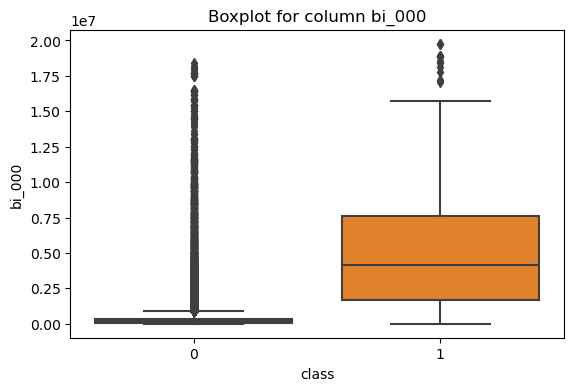

In [52]:
#remove those points which have value more than 1*(10**7) for this feature so as to analyse boxplot better
temp1 = train_df_10.loc[train_df_10["bi_000"] < 2*(10**7)]
boxplot("bi_000",temp1)

#### Observations
1 - for neg class 0th to 75th percentile values are zero   
2 - for pos class 0th to 50th percentile values are zero   
3 - those points which have value more than 0 are more likely to belong to pos class

#### Analysing ay_002 using boxplot :

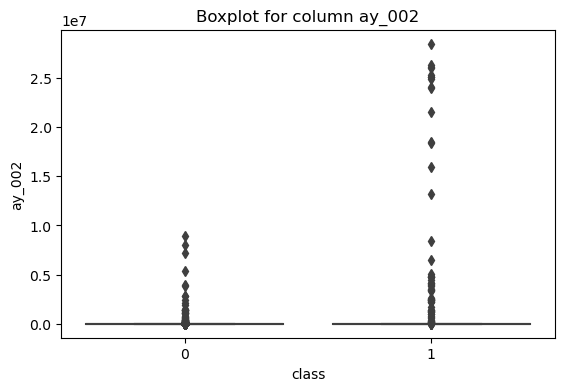

In [53]:
boxplot("ay_002",train_df_10)

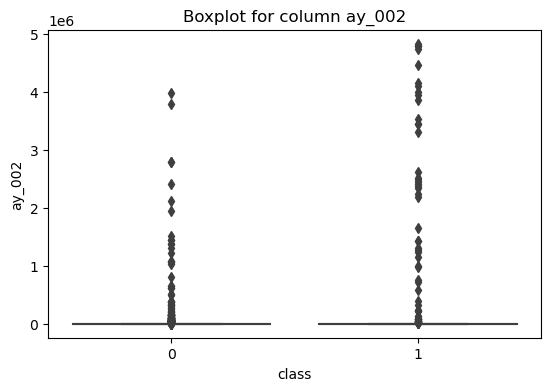

In [54]:
#remove those points which have value more than 0.5*(10**7) for this feature so as to analyse boxplot better
temp1 = train_df_10.loc[train_df_10["ay_002"] < 0.5*(10**7)]
boxplot("ay_002",temp1)

#### Observations
 1 - for neg class 0th to 75th percentile values are zero  
 2 - for pos class 0th to 75th percentile values are zero  
 3 - There is not much clear seperability between pos and neg classes but   
 4 - those points which have more than 10**7 belongs pos class

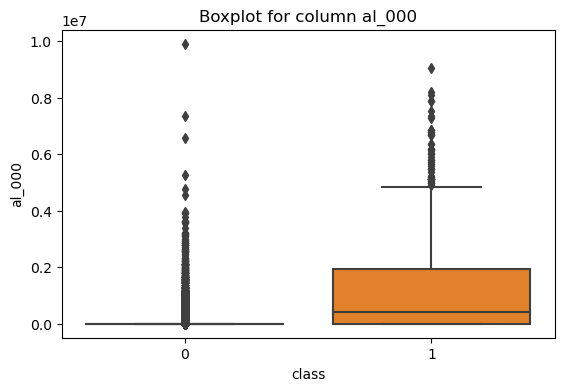

In [55]:
#remove those points which have value more than 1*(10**7) for this feature so as to analyse boxplot better
temp1 = train_df_10.loc[train_df_10["al_000"] < 1*(10**7)]
boxplot("al_000",temp1)

#### Obseravtions
1 - for neg class oth to 75th percentile values are zero   
2 - for pos class oth to 50th percentile values are zero   
3 - those points which have value more than 2107 belongs pos class   
4 - those points which have more than 0.110**7 belongs pos class

#### Analysing bj_000 using boxplot :

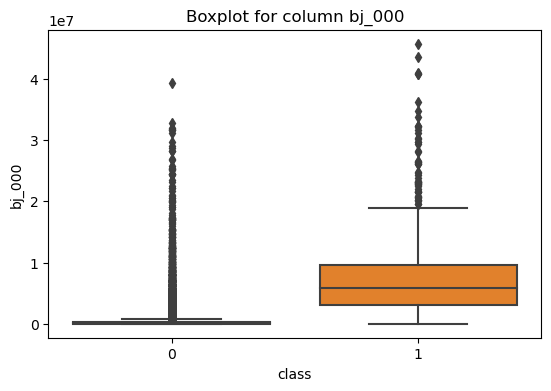

In [56]:
boxplot("bj_000",train_df_10)

#### Obseravtions
1 - for neg class oth to 75th percentile most of the values are zero   
2 - those points which have value more than 410*7 belongs pos class   
3 - those points which have value more than 0 are vely likely belongs to pos class

####  Analysing ag_002 using boxplot :

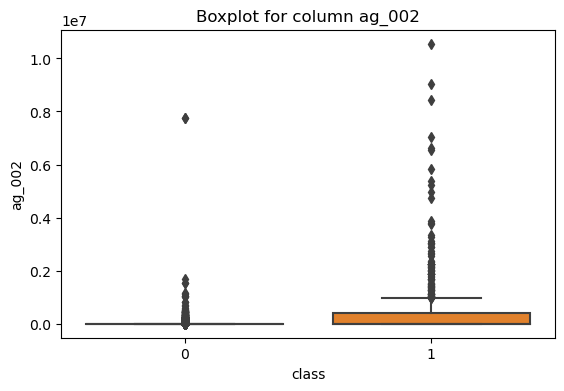

In [57]:
boxplot("ag_002",train_df_10)

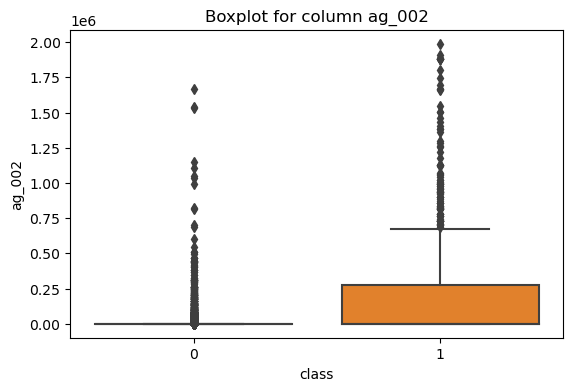

In [58]:
#remove those points which have value more than 0.2*(10**7) for this feature so as to analyse boxplot better
temp1 = train_df_10.loc[train_df_10["ag_002"] < 0.2*(10**7)]
boxplot("ag_002",temp1)

#### Obseravtions
1 - for neg class 0th to 75th percentile values are zero   
2 - those points which have value more than 0 are most likely belongs to pos class

#### Analysing ag_001 using boxplot violinplot :

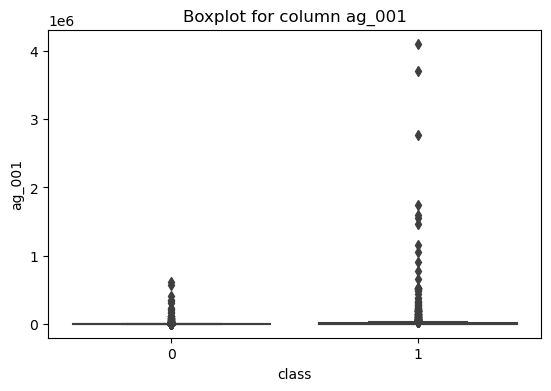

In [59]:
boxplot("ag_001",train_df_10)

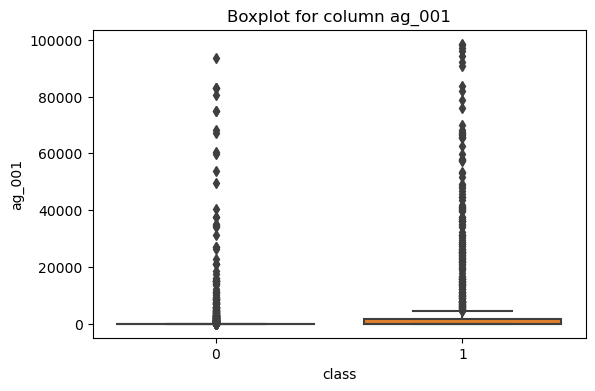

In [60]:
#remove those points which have value more than 0.01*(10**7) for this feature so as to analyse boxplot better
temp1 = train_df_10.loc[train_df_10["ag_001"] < 0.01*(10**7)]
boxplot("ag_001",temp1)

#### Obseravtions
1 - for neg class oth to 75th percentile values are zero   
2 - those points which have value more than 0.810*7 belongs pos class   
3 - there is not much seperability between pos and neg class

####  Analysing ay_006 using boxplot violinplot :

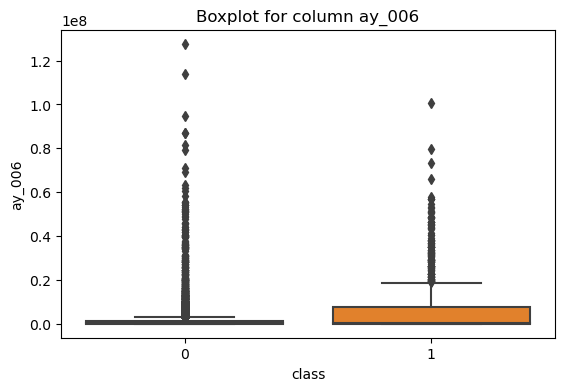

In [61]:
boxplot("ay_006",train_df_10)

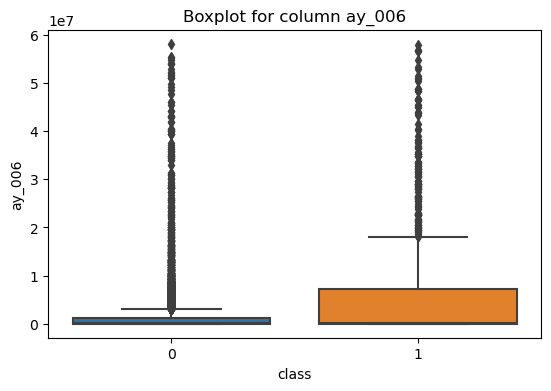

In [62]:
#remove those points which have value more than 0.6*(10**8) for this feature so as to analyse boxplot better
temp1 = train_df_10.loc[train_df_10["ay_006"] < 0.6*(10**8)]
boxplot("ay_006",temp1)

#### Obseravtions
1 - for neg class 0th to 75th percentile most of the values are close to zero   
2 - those points which have value more than 110*7 belongs neg class

#### Analysing ay_005 using boxplot violinplot :

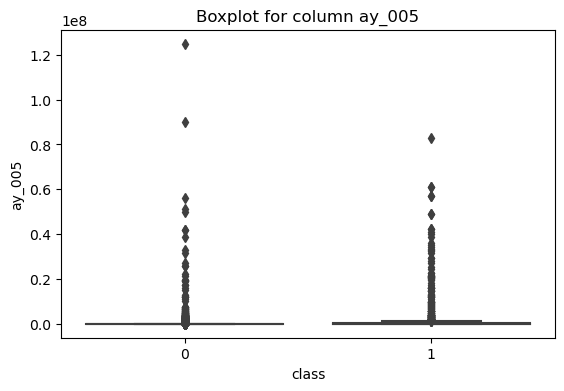

In [63]:
boxplot("ay_005",train_df_10)

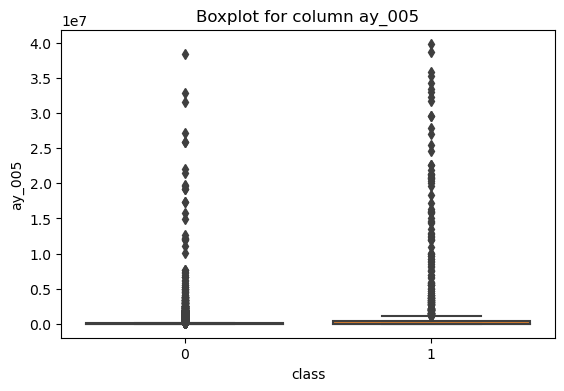

In [64]:
#remove those points which have value more than 0.4*(10**8) for this feature so as to analyse boxplot better
temp1 = train_df_10.loc[train_df_10["ay_005"] < 0.4*(10**8)]
boxplot("ay_005",temp1)

#### Obseravtions
1 - for neg class between 0th to 75th percentile most of the values are close to zero   
2 - for pos class also between 0th to 75th percentile most of the values are close to zero   
3 - there is no clear seperation between pos and neg class

#### Analysing cc_000 using boxplot violinplot :

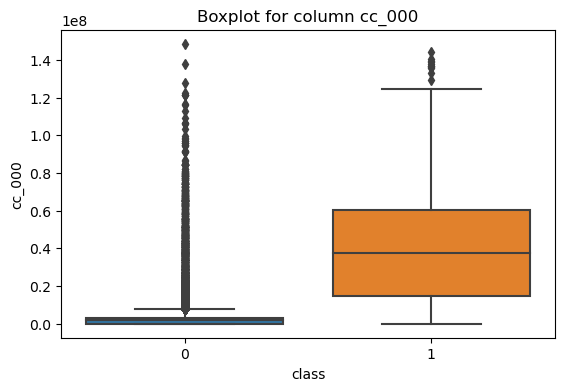

In [65]:
boxplot("cc_000",train_df_10)

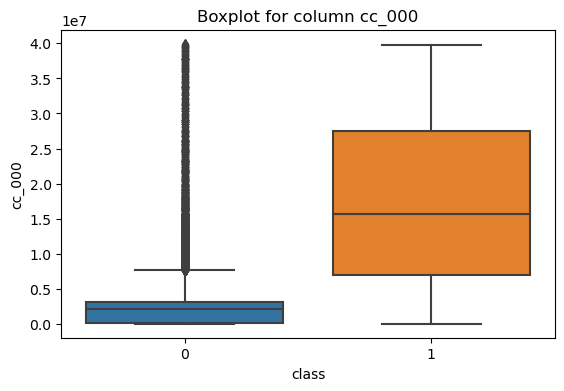

In [66]:
#remove those points which have value more than 0.4*(10**8) for this feature so as to analyse boxplot better
temp1 = train_df_10.loc[train_df_10["cc_000"] < 0.4*(10**8)]
boxplot("cc_000",temp1)

#### Obseravtions
1 - for neg class 0th to 75th percentile most of the values are zero   
2 - those points which have value more than 0.110*7 are vely likely belongs to pos class   

#### Analysing ay_008 using boxplot :

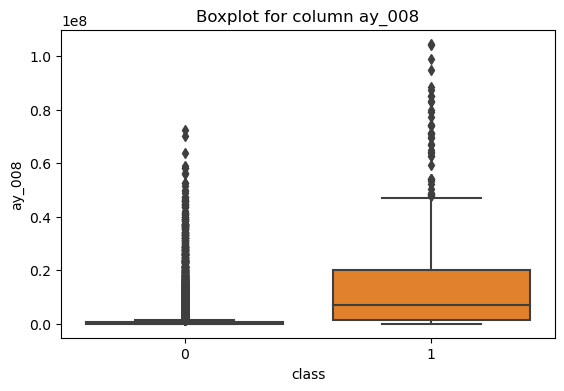

In [67]:
boxplot("ay_008",train_df_10)

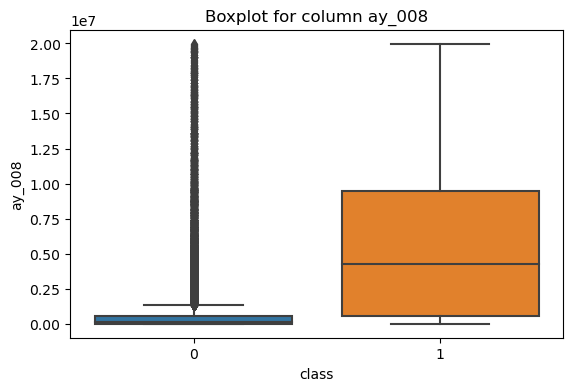

In [68]:
#remove those points which have value more than 0.2*(10**8) for this feature so as to analyse boxplot better
temp1 = train_df_10.loc[train_df_10["ay_008"] < 0.2*(10**8)]
boxplot("ay_008",temp1)

#### Obseravtions
1 - for neg class oth to 75th percentile most of the values are zero   
2 - those points which have value more than 0.7107 belongs pos class   
3 - those points which have value more than 0.2510**7 are very likely belongs to pos class   

#### Observation and Conclusions from univariate analysis
1 - There are lots of values in all the features which are higher than median so these can be ouliers.   
2 - All the features have some overlap between positive and neg labels   
3 - features like ay_008,cc_000 and bj_000 are more helping in seperting pos from neg class since these have least overlap between pos and neg labels

### 2.8 Bivariate Analysis

For bivariate analysis we will use pair plots for 5 important features that we got above.

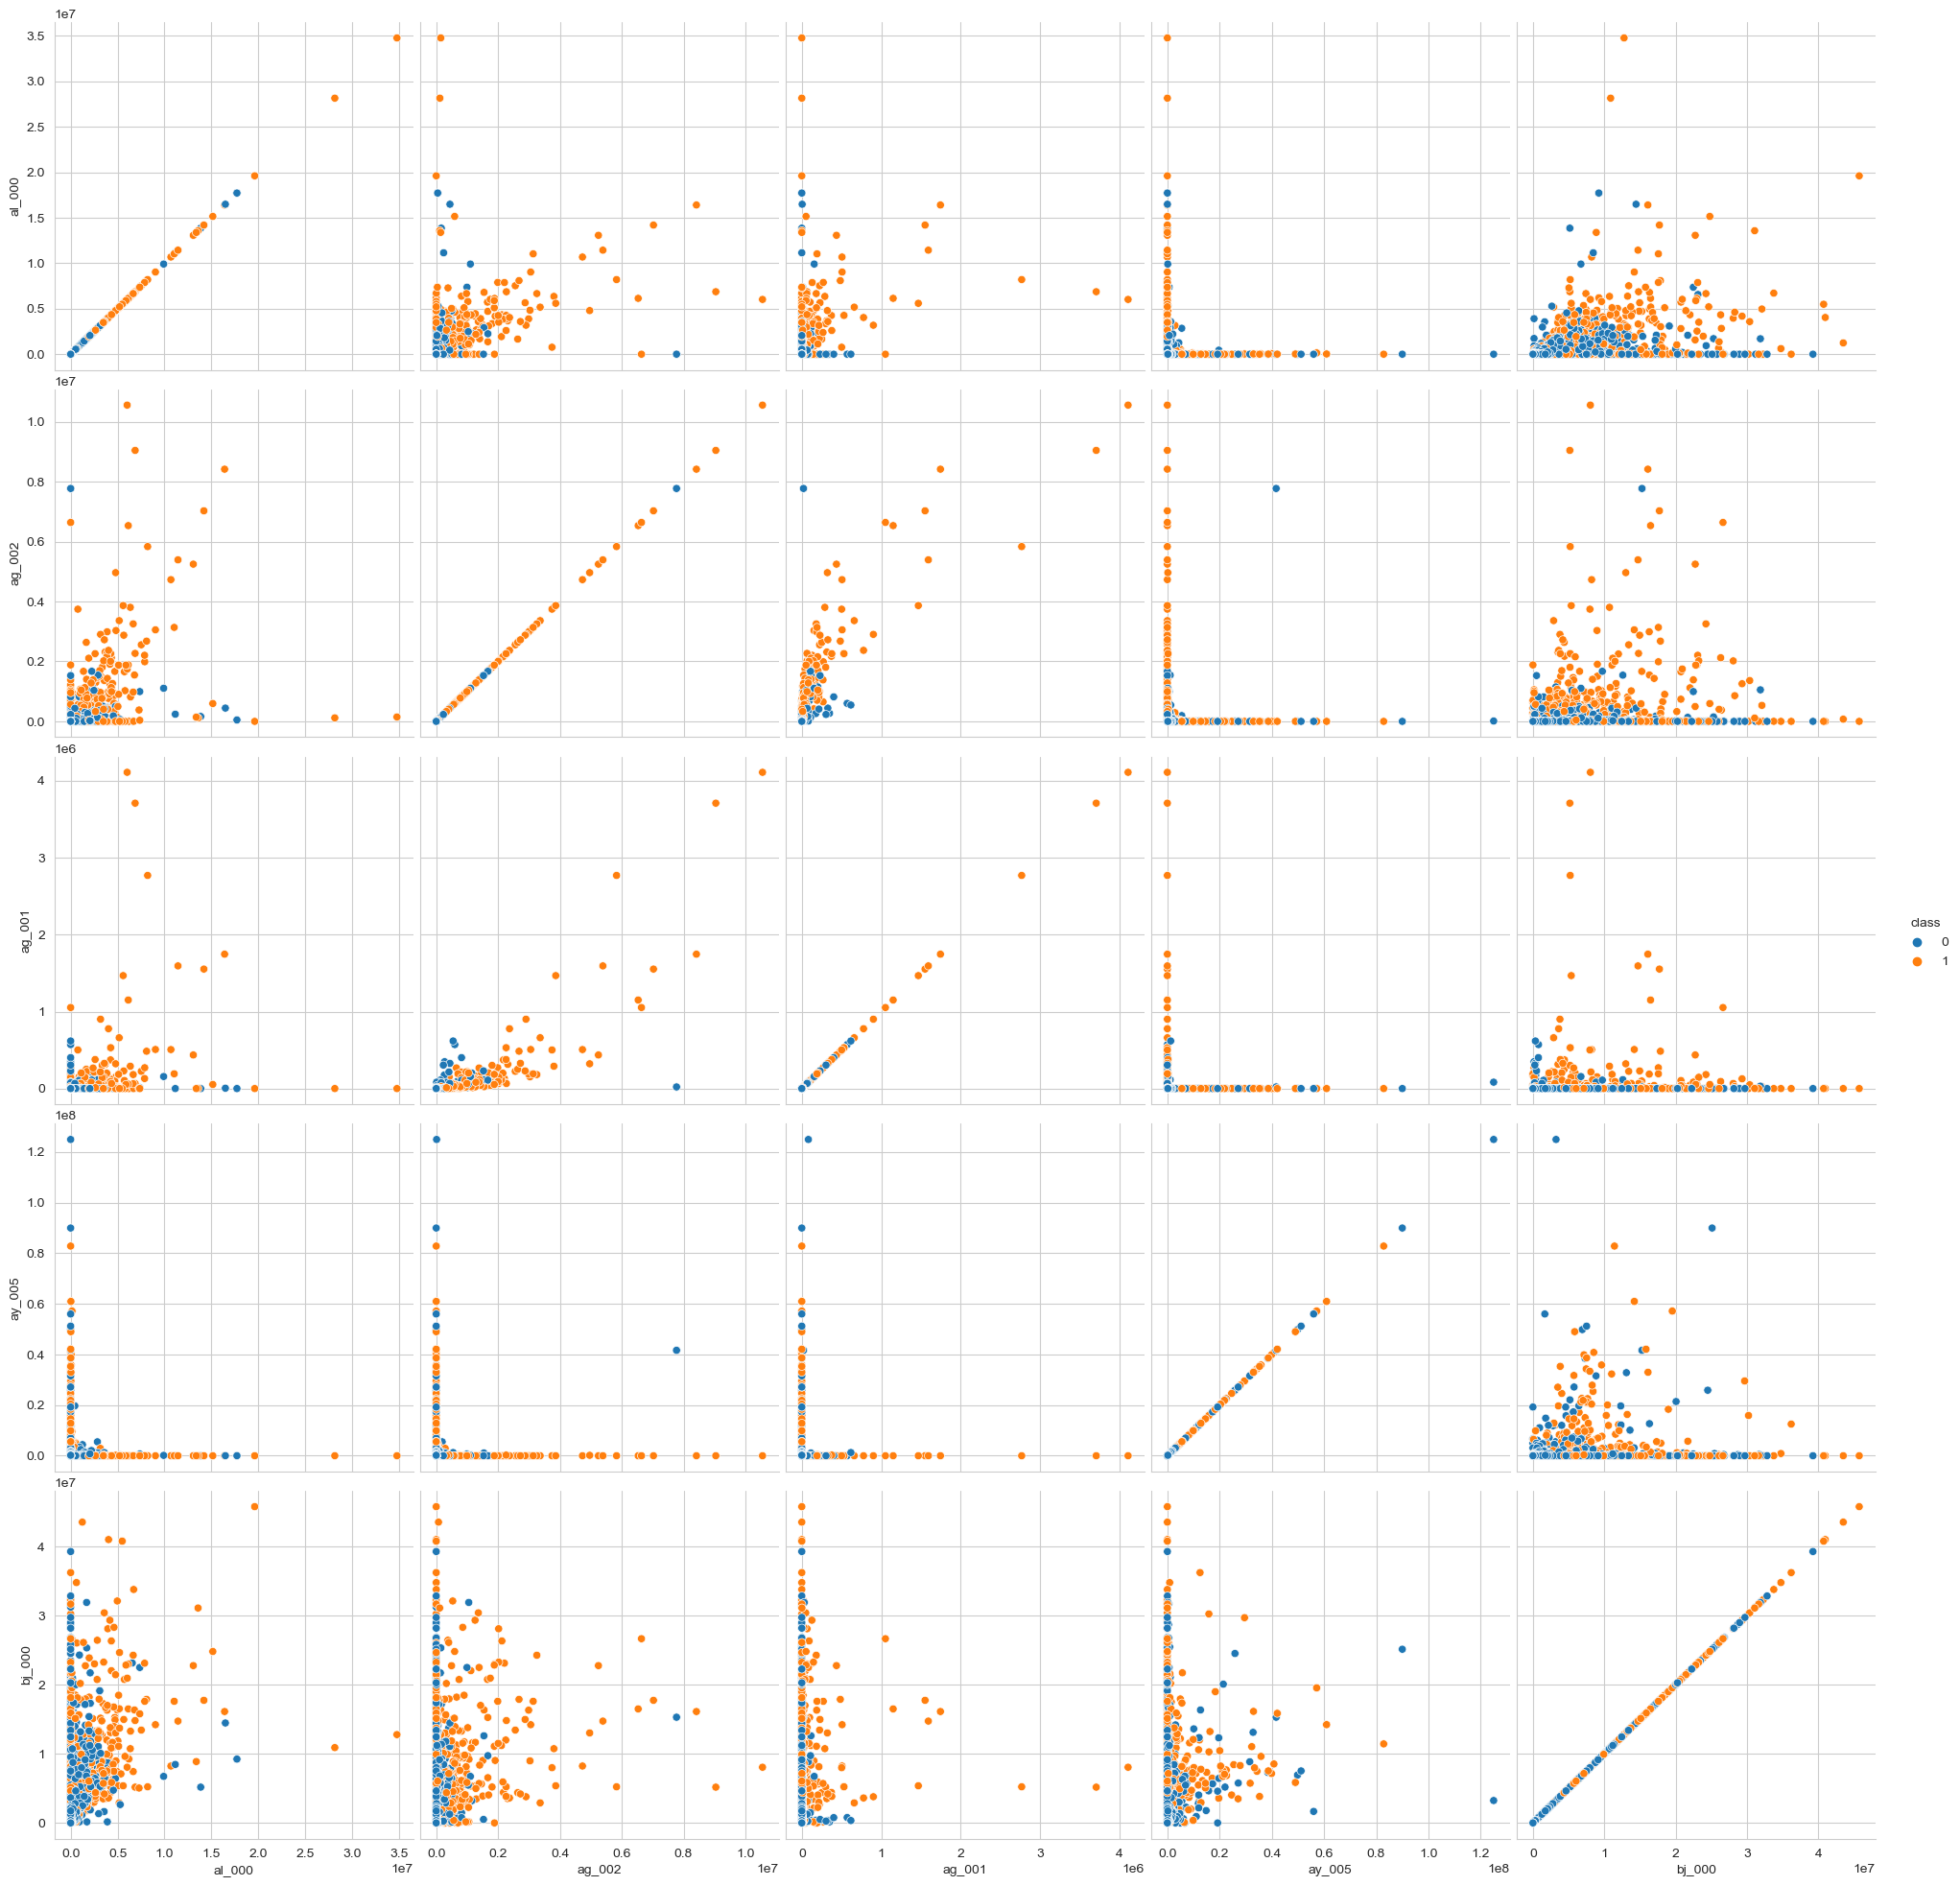

In [69]:
sns.set_style("whitegrid")
sns.pairplot(train_df_5, hue="class", size=4,diag_kind=None)
plt.show()

#### Observations
1 - All the poins brlonging to pos and neg classes are are jumbled up, and there is not much clear seperability between classes using any pair of features   
2 - Combination of ag_002 and ag_001 feature might be useful in seperating classes

In [70]:
df = train_df_5.sample(frac=1)
df = df.head(10000)

target = df["class"]
df = df.drop(["class"],axis=1)# dropping class labels

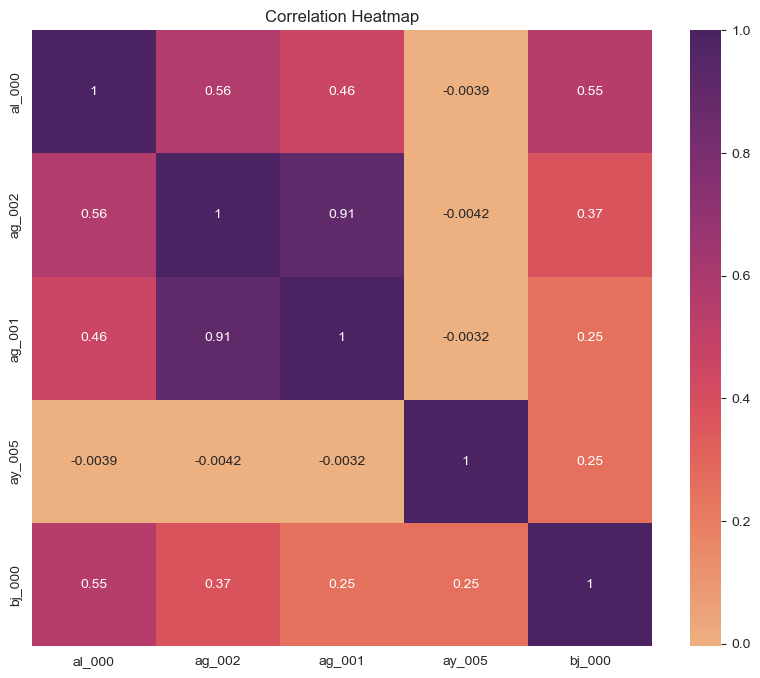

In [71]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='flare')
plt.title('Correlation Heatmap')
plt.show()

### summarizing Exploritory Data Analysis
1 - Data is highly imbalance   
2 - There are lots of missing value in data   
3 - There is only column with no missing value   
4 - one column has very high missing value 82%   
5 - we replaced and dropped missing values based on percentage of missing values    
6 - in every features valued between 0 to 60th percentile is significantly lower(Zero) in comparison with valuee between 60th to 100th percentile.

## 3.Balancing Dataset

In [72]:
train_df = pd.read_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\clean_train.csv")# read unbalance data
target = train_df["class"]
train_df = train_df.drop(["class"],axis=1)

over_samp = RandomOverSampler()
train_df_bal, target_bal = over_samp.fit_resample(train_df, target.ravel())
train_df_bal["class"] = target_bal

# store balanced data into disk
#train_df_bal.to_csv("/content/drive/MyDrive/Scania truck failure data/train_clean_balanced.csv",index=False)

## 4.Feature Engineering

#### We will try following feature engg
1 - Taking sin of all the top 10 features thta we got above using feature importance   
2 - log(x+1) for same features (here we are not using log(x) because some values are 0)   
3 - Absolute deviation of all points from median for bi_000, ay_006, cc_000, ay_008, bj_000 features(here we are not taking all features because median for some features are zero)

In [73]:
train_bal = pd.read_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\train_clean_balanced.csv")
train = pd.read_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\clean_train.csv")
cv = pd.read_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\clean_cv.csv")
test = pd.read_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\clean_test.csv")

top_10 = ['bi_000', 'ay_002', 'ay_006', 'cc_000', 'ay_008', 'al_000', 'ag_001','ag_002', 'bj_000', 'ay_005']
top_4 = ["ay_006", "cc_000", "ay_008", "bj_000"]

In [74]:
for i in tqdm(top_10):
    temp1 = i + "_sin"
    temp2 = i + "_log"

    train_bal[temp2] = train_bal[i].apply(lambda x: math.log(x+1))
    train_bal[temp1] = train_bal[i].apply(lambda x: math.sin(x))

    train[temp2] = train[i].apply(lambda x: math.log(x+1))
    train[temp1] = train[i].apply(lambda x: math.sin(x))

    cv[temp2] = cv[i].apply(lambda x: math.log(x+1))
    cv[temp1] = cv[i].apply(lambda x: math.sin(x))

    test[temp2] = test[i].apply(lambda x: math.log(x+1))
    test[temp1] = test[i].apply(lambda x: math.sin(x))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.11it/s]


In [75]:
top_4_median = list(train[top_4].median())

for i in tqdm(range(4)):

    temp1 = top_4[i] + "_median"

    train_bal[temp1] = train_bal[top_4[i]] - top_4_median[i]

    train[temp1] = train[top_4[i]] - top_4_median[i]

    cv[temp1] = cv[top_4[i]] - top_4_median[i]

    test[temp1] = test[top_4[i]] - top_4_median[i]

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 255.79it/s]


In [76]:
top_4_median

[165116.0, 2112040.0, 92906.0, 154640.0]

In [77]:
# save dataset after balancing to disk
train.to_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\train_clean_feature.csv",index=False)
train_bal.to_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\train_bal_clean_feature.csv",index=False)
cv.to_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\cv_clean_feature.csv",index=False)
test.to_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\test_clean_feature.csv",index=False)

## 5.Modeling

Defining some utility functions

In [78]:
def confusion_mat(cm_cv,cm_test):
    """
    this function takes train,cv,test confusion matrix as input and plots heatmap for confusion matrix
    """
    plt.figure(figsize=(14, 4))
    plt.subplot(1,3,2)
    sns.heatmap(cm_cv, annot=True,fmt="d",cmap='Blues')
    plt.xlabel("actual class label")
    plt.ylabel("predicted class label")
    plt.title("CV confusion matrix")
    plt.show()

    plt.figure(figsize=(14, 4))
    plt.subplot(1,3,3)
    sns.heatmap(cm_test, annot=True,fmt="d",cmap='Blues')
    plt.xlabel("actual class label")
    plt.ylabel("predicted class label")
    plt.title("Test confusion matrix")
    plt.show()

In [79]:
def best_hyper(hyperparameter,macro_f1_train,macro_f1_cv):
    """
    Takes hyperparameter,macro_f1_train,macro_f1_cv as input and plots huperparameter vs f1 score plot
    for train and cv
    """

    plt.plot(hyperparameter,macro_f1_train, label='train macro_f1 score')
    plt.plot(hyperparameter,macro_f1_cv, label='cv macro_f1 score')
    plt.ylabel("macro_f1 score")
    plt.xlabel("hyper paramater")
    plt.title('Hyper-parameter VS macro_f1 score plot')
    plt.legend()
    plt.show()

In [80]:
def total_cost(conf_mat_cv,conf_mat_test):
    """
    takes confusion matrix for test and cv as input and returns total cost
    """
    x = conf_mat_cv[0][1]*500 + conf_mat_cv[1][0]*10
    y = conf_mat_test[0][1]*500 + conf_mat_test[1][0]*10

    print("Total cost on CV data is ",x)
    print("Total cost on Test data is ",y)

In [81]:
def custom_model(train,cv,test,test_also=0,base_learners=10,n_estimators=100):
    """
    in this function we are implementing custom stacling classifier
    1 - we take tarin dat and split it into 50% say set1 and set2
    2 - then randomly select samples say(10) with replacement and buils k decesion tress from set 1
    3 - then use set 2 to predict target column of set2 and using this create new dataset
    4  -new data will have no of features = k
    5 - now on this new dataset train a XGBoost with n_estimators = 100 an dmake final predictions
    """
    train1,train2 = train_test_split(train,test_size=0.5,random_state=1,stratify=train["class"])

    samples = []
    for i in range(10):
        samples.append(train1.sample(frac=0.1, replace=True))

    classifiers = []
    for sample_data in samples:
        y = sample_data["class"]
        x = sample_data.drop(["class"],axis=1)
        clf = DecisionTreeClassifier(max_depth=6,splitter="best")
        clf.fit(x,y)
        classifiers.append(clf)

    y_train2 = train2["class"]
    x_train2 = train2.drop(["class"],axis=1)

    y_cv = cv["class"]
    x_cv = cv.drop(["class"],axis=1)

    if test_also:
        y_test = test["class"]
        x_test = test.drop(["class"],axis=1)

    new_dataset_train = []
    new_dataset_cv = []
    if test_also:
        new_dataset_test = []

    for classifier in classifiers:
        new_dataset_train.append(classifier.predict(x_train2))
        new_dataset_cv.append(classifier.predict(x_cv))
        if test_also:
            new_dataset_test.append(classifier.predict(x_test))


    new_dataset_train = np.array(new_dataset_train)
    new_dataset_train = new_dataset_train.T

    new_dataset_cv = np.array(new_dataset_cv)
    new_dataset_cv = new_dataset_cv.T

    if test_also:
        new_dataset_test = np.array(new_dataset_test)
        new_dataset_test = new_dataset_test.T

    clf = XGBClassifier(n_estimators=n_estimators, n_jobs=-1,verbosity=0,learning_rate=0.1)
    clf.fit(new_dataset_train,y_train2)
    y_train_pred = clf.predict(new_dataset_train)
    y_cv_pred = clf.predict(new_dataset_cv)

    if test_also:
        y_test_pred = clf.predict(new_dataset_test)

    f1_train = f1_score(y_train2,y_train_pred, average='macro')
    f1_cv = f1_score(y_cv,y_cv_pred, average='macro')

    if test_also:
        f1_test = f1_score(y_test,y_test_pred, average='macro')


    if test_also:
        print("train macro f1 is ",f1_train,"cv macro f1 is ",f1_cv,"Test macro f1 is ",f1_test,"for no of base learners = ",base_learners)

    else:

        print("train macro f1 is ",f1_train,"and cv macro f1 is ",f1_cv,"for no of base learners = ",base_learners)
        print("---------------------------------------------------------------------------------------------------")

    if test_also:
        return y_train2,y_train_pred,y_cv,y_cv_pred,y_test,y_test_pred

### 5.1 Modelling with feature engg and balance the data

In [82]:
train = pd.read_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\train_bal_clean_feature.csv")
cv = pd.read_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\cv_clean_feature.csv")
test = pd.read_csv("C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\test_clean_feature.csv")

print("shape of train data is ",train.shape)
print("shape of train data is ",cv.shape)
print("shape of train data is ",test.shape)

shape of train data is  (18531, 190)
shape of train data is  (12000, 190)
shape of train data is  (16000, 190)


In [83]:
y_train = train["class"]
x_train = train.drop(["class"],axis=1)

y_cv = cv["class"]
x_cv = cv.drop(["class"],axis=1)

y_test = test["class"]
x_test = test.drop(["class"],axis=1)

In [84]:
# For Logistic Regression we will standardized the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_cv_std = scaler.transform(x_cv)
x_test_std = scaler.transform(x_test)

### Random Forest

In [85]:
n_estimators = [25,50,75,100,150]
macro_f1_train = []
macro_f1_cv = []

for i in n_estimators:
    clf = RandomForestClassifier(n_estimators=i,n_jobs=-1)
    #print(clf)
    clf.fit(x_train,y_train)
    y_train_pred = clf.predict(x_train)
    y_cv_pred = clf.predict(x_cv)
    f1_train = f1_score(y_train,y_train_pred, average='macro')
    f1_cv = f1_score(y_cv,y_cv_pred, average='macro')
    print("train macro f1 is ",f1_train,"and cv macro f1 is ",f1_cv,"for no of estimators = ",i)
    print("---------------------------------------------------------------------------------------------------")
    macro_f1_train.append(f1_train)
    macro_f1_cv.append(f1_cv)

train macro f1 is  0.9977166308161316 and cv macro f1 is  0.857195356869628 for no of estimators =  25
---------------------------------------------------------------------------------------------------
train macro f1 is  1.0 and cv macro f1 is  0.8691806817243855 for no of estimators =  50
---------------------------------------------------------------------------------------------------
train macro f1 is  1.0 and cv macro f1 is  0.8663055318721742 for no of estimators =  75
---------------------------------------------------------------------------------------------------
train macro f1 is  1.0 and cv macro f1 is  0.8613291080804982 for no of estimators =  100
---------------------------------------------------------------------------------------------------
train macro f1 is  1.0 and cv macro f1 is  0.8727658826717974 for no of estimators =  150
---------------------------------------------------------------------------------------------------


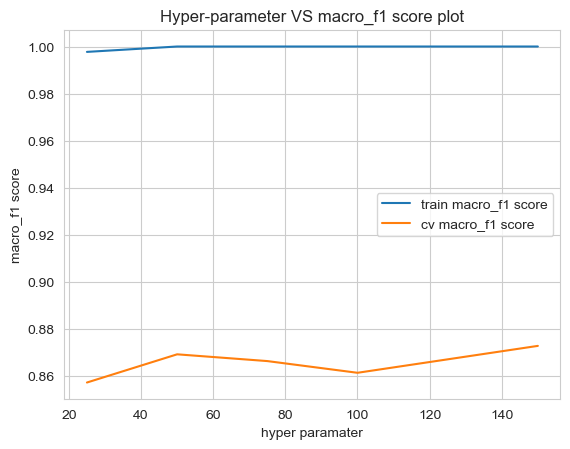

In [86]:
best_hyper(n_estimators,macro_f1_train,macro_f1_cv)

In [87]:
clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf.fit(x_train,y_train)

y_train_pred = clf.predict(x_train)
y_cv_pred = clf.predict(x_cv)
y_test_pred = clf.predict(x_test)

f1_train = f1_score(y_train,y_train_pred, average='macro')
f1_cv = f1_score(y_cv,y_cv_pred, average='macro')
f1_test = f1_score(y_test,y_test_pred, average='macro')

cm_cv = confusion_matrix(y_cv,y_cv_pred)
cm_test = confusion_matrix(y_test,y_test_pred)

print("Train macro f1 is ",f1_train,"CV macro f1 is ",f1_cv,"and Test macro f1 is ",f1_test,"for Best value of C")
print("--------------------------------------------------------------------------------------------")
total_cost(cm_cv,cm_test)

Train macro f1 is  1.0 CV macro f1 is  0.8716922743542319 and Test macro f1 is  0.8789555465728177 for Best value of C
--------------------------------------------------------------------------------------------
Total cost on CV data is  12170
Total cost on Test data is  13290


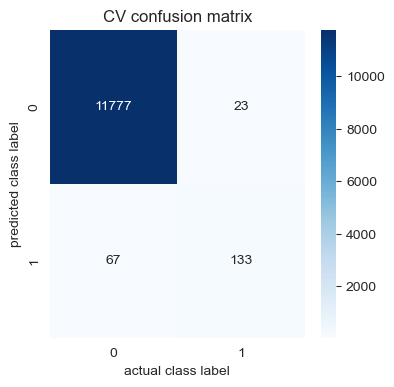

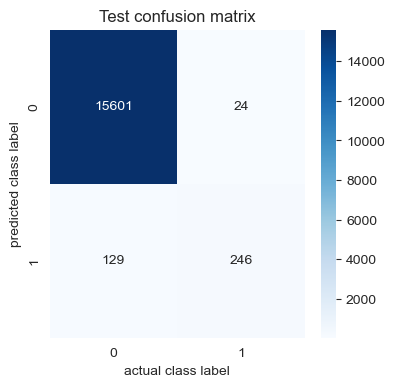

In [88]:
cm_cv = confusion_matrix(y_cv,y_cv_pred)
cm_test = confusion_matrix(y_test,y_test_pred)

confusion_mat(cm_cv,cm_test)

### Adaboost

In [89]:
estimators = [25,50,75,120,150]
learning_rate = [0.5,1]
macro_f1_train = []
macro_f1_cv = []
#macro_f1_test = []

for i in estimators:
    for j in learning_rate:
        clf = AdaBoostClassifier(n_estimators=i,learning_rate=j)
        clf.fit(x_train,y_train)
        y_train_pred = clf.predict(x_train)
        y_cv_pred = clf.predict(x_cv)
        f1_train = f1_score(y_train,y_train_pred, average='macro')
        f1_cv = f1_score(y_cv,y_cv_pred, average='macro')
        #f1_test = f1_score(y_test,y_test_pred, average='macro')
        print('Estimators = ',i,'learning rate = ',j,'Train macro F1',f1_train,'CV Macro f1',f1_cv)#,'test Macro f1',f1_test)
        print("---------------------------------------------------------------------------------------------------")
        macro_f1_train.append(f1_train)
        macro_f1_cv.append(f1_cv)
        #macro_f1_test.append(f1_test)
    print("*******************************************************************************************************")

Estimators =  25 learning rate =  0.5 Train macro F1 0.8260704003605641 CV Macro f1 0.7813117794223132
---------------------------------------------------------------------------------------------------
Estimators =  25 learning rate =  1 Train macro F1 0.8479301746076006 CV Macro f1 0.7990068948783426
---------------------------------------------------------------------------------------------------
*******************************************************************************************************
Estimators =  50 learning rate =  0.5 Train macro F1 0.8678986747537631 CV Macro f1 0.8243762203601097
---------------------------------------------------------------------------------------------------
Estimators =  50 learning rate =  1 Train macro F1 0.8937787264211423 CV Macro f1 0.8341682226293823
---------------------------------------------------------------------------------------------------
****************************************************************************************

In [90]:
# clf.fit(x_train,y_train)

y_train_pred = clf.predict(x_train)
y_cv_pred = clf.predict(x_cv)
y_test_pred = clf.predict(x_test)

f1_train = f1_score(y_train,y_train_pred, average='macro')
f1_cv = f1_score(y_cv,y_cv_pred, average='macro')
f1_test = f1_score(y_test,y_test_pred, average='macro')

cm_cv = confusion_matrix(y_cv,y_cv_pred)
cm_test = confusion_matrix(y_test,y_test_pred)

print("Train macro f1 is - ",f1_train,"CV macro f1 is - ",f1_cv,"and Test macro f1 is - ",f1_test,"for Best value of alpha")
print("--------------------------------------------------------------------------------------------")
total_cost(cm_cv,cm_test)

Train macro f1 is -  0.9790812266115787 CV macro f1 is -  0.8527413816948914 and Test macro f1 is -  0.8683403677977655 for Best value of alpha
--------------------------------------------------------------------------------------------
Total cost on CV data is  24140
Total cost on Test data is  27230


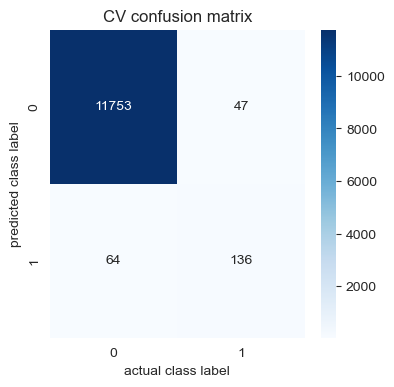

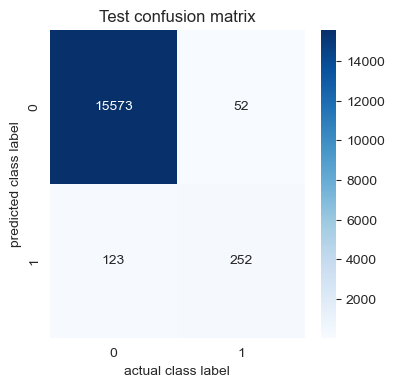

In [91]:
confusion_mat(cm_cv,cm_test)

### XG Boost

In [92]:
estimators = [25,50,75,100,150]
learning_rate = [0.05,0.1]
macro_f1_train = []
macro_f1_cv = []
#macro_f1_test = []

for i in estimators:
    for j in learning_rate:
        clf = XGBClassifier(n_estimators=i, n_jobs=-1,verbosity=0,learning_rate=j)
        clf.fit(x_train,y_train)
        y_train_pred = clf.predict(x_train)
        y_cv_pred = clf.predict(x_cv)
        f1_train = f1_score(y_train,y_train_pred, average='macro')
        f1_cv = f1_score(y_cv,y_cv_pred, average='macro')
        #f1_test = f1_score(y_test,y_test_pred, average='macro')
        print('Estimators = ',i,'learning rate = ',j,'Train macro F1',f1_train,'CV Macro f1',f1_cv)#,'test Macro f1',f1_test)
        print("---------------------------------------------------------------------------------------------------")
        macro_f1_train.append(f1_train)
        macro_f1_cv.append(f1_cv)
        #macro_f1_test.append(f1_test)
    print("*******************************************************************************************************")

Estimators =  25 learning rate =  0.05 Train macro F1 0.9403803696596533 CV Macro f1 0.8497135341469282
---------------------------------------------------------------------------------------------------
Estimators =  25 learning rate =  0.1 Train macro F1 0.9671537660587057 CV Macro f1 0.8657951963212205
---------------------------------------------------------------------------------------------------
*******************************************************************************************************
Estimators =  50 learning rate =  0.05 Train macro F1 0.9638373365108446 CV Macro f1 0.8668214866883914
---------------------------------------------------------------------------------------------------
Estimators =  50 learning rate =  0.1 Train macro F1 0.9907442648006353 CV Macro f1 0.8819640630897507
---------------------------------------------------------------------------------------------------
**********************************************************************************

In [93]:
clf = XGBClassifier(n_estimators=150, n_jobs=-1,verbosity=0,learning_rate=0.1)
clf.fit(x_train,y_train)

y_train_pred = clf.predict(x_train)
y_cv_pred = clf.predict(x_cv)
y_test_pred = clf.predict(x_test)

f1_train = f1_score(y_train,y_train_pred, average='macro')
f1_cv = f1_score(y_cv,y_cv_pred, average='macro')
f1_test = f1_score(y_test,y_test_pred, average='macro')

cm_cv = confusion_matrix(y_cv,y_cv_pred)
cm_test = confusion_matrix(y_test,y_test_pred)

print("Train macro f1 is ",f1_train,"CV macro f1 is ",f1_cv,"and Test macro f1 is ",f1_test,"for Best value of C")
print("--------------------------------------------------------------------------------------------")
total_cost(cm_cv,cm_test)

Train macro f1 is  0.9992411038562334 CV macro f1 is  0.8923714344588031 and Test macro f1 is  0.9018160183455628 for Best value of C
--------------------------------------------------------------------------------------------
Total cost on CV data is  12050
Total cost on Test data is  13540


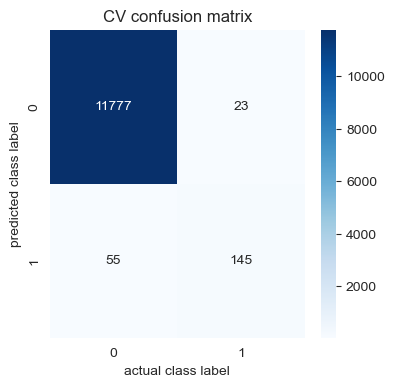

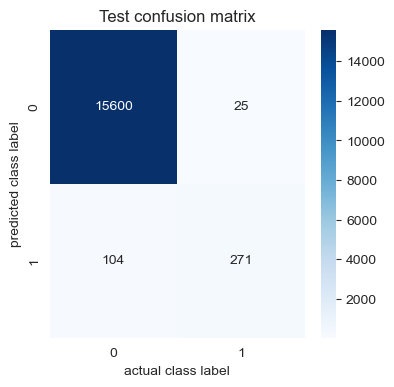

In [94]:
cm_cv = confusion_matrix(y_cv,y_cv_pred)
cm_test = confusion_matrix(y_test,y_test_pred)

confusion_mat(cm_cv,cm_test)

In [95]:
'''base_learner = [10,20,25,30,40,50,60]
for i in base_learner:
    custom_model(train=train,cv=cv,test=test,test_also=0,base_learners=i,n_estimators=100)'''

'base_learner = [10,20,25,30,40,50,60]\nfor i in base_learner:\n    custom_model(train=train,cv=cv,test=test,test_also=0,base_learners=i,n_estimators=100)'

In [96]:
'''y_train,y_train_pred,y_cv,y_cv_pred,y_test,y_test_pred = custom_model(train=train,cv=cv,test=test,test_also=1,base_learners=30)

cm_cv = confusion_matrix(y_cv,y_cv_pred)
cm_test = confusion_matrix(y_test,y_test_pred)

total_cost(cm_cv,cm_test)'''

'y_train,y_train_pred,y_cv,y_cv_pred,y_test,y_test_pred = custom_model(train=train,cv=cv,test=test,test_also=1,base_learners=30)\n\ncm_cv = confusion_matrix(y_cv,y_cv_pred)\ncm_test = confusion_matrix(y_test,y_test_pred)\n\ntotal_cost(cm_cv,cm_test)'

In [97]:
'''confusion_mat(cm_cv,cm_test)'''

'confusion_mat(cm_cv,cm_test)'

### Observations

In [98]:
pretty=prettytable.PrettyTable()

pretty.add_column("model",["Random Forest","XG Boost","Ada Boost"])
pretty.add_column("Macro f1 score",["0.87","0.91","0.81"])
pretty.add_column("Total Cost",["11770","37980","169800"])
pretty.add_column("False Negative",["33","75","339"])
pretty.add_column("False Positive",["127","48","38"])

print(pretty)

+---------------+----------------+------------+----------------+----------------+
|     model     | Macro f1 score | Total Cost | False Negative | False Positive |
+---------------+----------------+------------+----------------+----------------+
| Random Forest |      0.87      |   11770    |       33       |      127       |
|    XG Boost   |      0.91      |   37980    |       75       |       48       |
|   Ada Boost   |      0.81      |   169800   |      339       |       38       |
+---------------+----------------+------------+----------------+----------------+


### Conclusion
Best model that we got is XG Boost with 0.91 macro f1 score and total cost of 37980

In [99]:
# Pickling it,

clf = XGBClassifier(n_estimators=150, n_jobs=-1,verbosity=0,learning_rate=0.1)
clf.fit(x_train,y_train)

my_model = "C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\APS2model2.pkl"
joblib.dump(clf,my_model)

#my_model = "/content/drive/MyDrive/Scania truck failure data/APSmodel.pkl"
#clf = joblib.load(my_model)

['C:\\Users\\gouth\\OneDrive\\Documents\\Scania truck failure data\\APS2model2.pkl']